In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.linear_model import LassoCV

In [2]:
df = pd.read_csv('data/ANSUR_MALE.csv')
df.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [3]:
df.shape

(4082, 99)

In [4]:
df_numeric = df.select_dtypes(exclude='object')
df_numeric.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,...,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,233,1395,326,220,1293,245,193,394,338,257,...,316,870,225,371,1054,167,815,72.6,1.702,25.062103
2,287,1430,341,230,1327,256,196,427,408,261,...,329,964,255,411,1041,180,831,92.9,1.735,30.861480
3,234,1347,310,230,1239,262,199,401,359,262,...,315,857,205,399,968,176,793,79.4,1.655,28.988417
4,250,1585,372,247,1478,267,224,435,356,263,...,303,868,214,379,1245,188,954,94.6,1.914,25.823034


In [5]:
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(df_numeric)
tsne_features[0:5, :]

array([[  1.5230564,   3.3198643],
       [ 26.8448   ,   9.376349 ],
       [ -6.6430497, -15.957662 ],
       [ 37.74792  , -20.893974 ],
       [-39.739376 ,  33.79733  ]], dtype=float32)

In [6]:
df['x'] = tsne_features[:, 0]
df['y'] = tsne_features[:, 1]

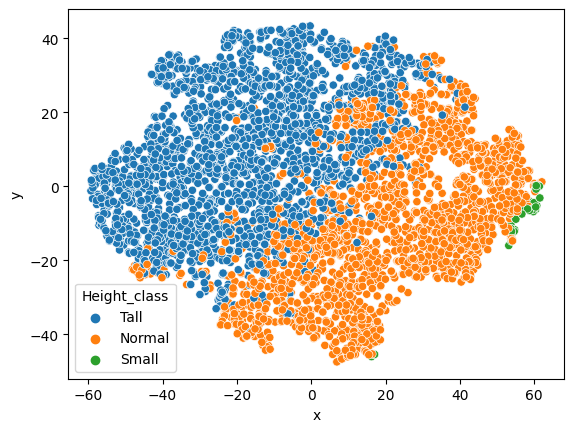

In [7]:
sns.scatterplot(x='x', y='y', hue='Height_class', data=df)
plt.show()

In [8]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,Branch,Component,Gender,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,Overweight,Tall
1,Combat Support,Regular Army,Male,Overweight,Normal
2,Combat Support,Regular Army,Male,Overweight,Normal
3,Combat Service Support,Regular Army,Male,Overweight,Normal
4,Combat Service Support,Regular Army,Male,Overweight,Tall


In [13]:
df.Height m

SyntaxError: invalid syntax (2396163151.py, line 1)

In [10]:
ansur_df = df[['Height_class', 'buttockheight', 'waistcircumference', 'shouldercircumference']]
ansur_df.head()

,Height_class,buttockheight,waistcircumference,shouldercircumference
0,Tall,882,933,1151
1,Normal,870,870,1119
2,Normal,901,964,1276
3,Normal,821,857,1155
4,Tall,1080,868,1231
